### Fill out:
Name & Surname: Chow Chun Kei

Student ID: 33520771

## W1&W2 post studio exercises (revision, kNN)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to answer the questions stated in the exercises in markdown cell. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

For these exercises you will use the `penguins` dataset from seaborn. Load it using load_dataset().

In [102]:
# as there were warnings about future changes so far non-affecteing our calculations - we'll import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Exercise 1 (cleaning, plotting)

First, create a numerical code for classification rather than using the string value of `species` (add column named, e.g., `code`). 

We will be using columns `flipper length`, `bill depth`, `species`, `code`; drop rows that have at least one missing value in any of these columns. Hint: dropna() and play around with its parameters such as subset etc.

Next, create:

- a feature array which consists of the `flipper length` and `bill depth` (**show first 5 rows**), 

- a target (i.e., Y or outcome) series which consists of the species `code` (**show first 5 values**),

- and an array which contains unique values of species names (**show all**). 

Also, **plot a scatter plot** of the feature array against the target series (include legend). Hint: Plot flipper length against bill depth and colour according to `target series` - label will have 3 levels: 0,1,2. If you would like scatterplot with species names - use penguins column `species`.)

In [184]:
# import all the modules needed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd

In [185]:
# load the dataset from seaborn
penguins = sns.load_dataset('penguins')

# drop missing values
penguins.dropna(subset=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'],how='any',inplace=True)

# check if all the missing values is dropped
print(penguins.isnull().sum())

# create a target where species is categorise as code
penguins['code'] = penguins.species.astype('category').cat.codes 

# show the first 5 rows and columns
penguins.head()



species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0


In [117]:
# Create and show feature array with bill depth and flipper length
X = penguins[['bill_depth_mm','flipper_length_mm']]
X.sample(5)

,bill_depth_mm,flipper_length_mm
148,17.8,195.0
125,19.0,199.0
294,15.0,216.0
97,18.5,196.0
72,17.2,196.0


In [118]:
# create target series consits of species code
Y = penguins[['code']]
Y.sample(5)

,code
150,0
56,0
327,2
194,1
70,0


In [119]:
# show array with all unique species name
unique_species= penguins['species'].unique()
unique_species

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

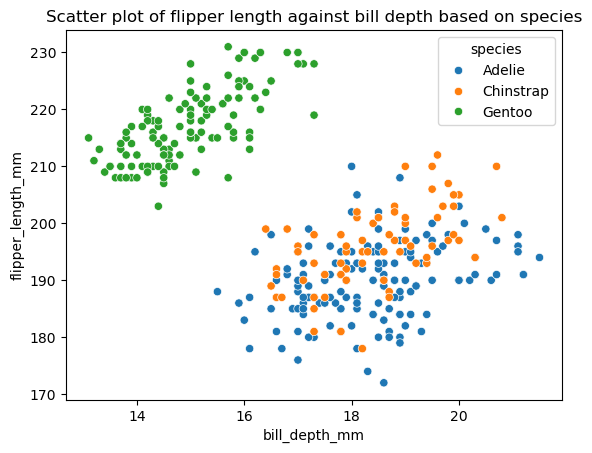

In [120]:
# Plotting scatter plot
sns.scatterplot(x="bill_depth_mm", y="flipper_length_mm", hue='species', data=penguins)
plt.title('Scatter plot of flipper length against bill depth based on species'); 

### Exercise 2 (kNN - raw data)

Split the data into training and testing set, with and 80:20 split, random state equal to 0. Create a kNN model with 10 nearest neighbours and uniform weights. Train (fit) model on training data. Calculate predictions for feature values in testing set (**show first 5 entries**). **Print accuracy** (import from sklearn.metrics) and **plot confusion matrix** using function from the pre-studio notebook.

In [135]:
# import the required models
from sklearn.model_selection import train_test_split # import the splitting method from sklearn
from sklearn.metrics import confusion_matrix # import the confusion matrix function
from sklearn.metrics import accuracy_score # import the score functions 
from sklearn.neighbors import KNeighborsClassifier

In [144]:
def plt_decision_boundaries(skm,xx,yy):
    """
    Takes a sklearn model (skm) with two features and plots the decision boundaries.
    xx and yy correspond to matrices with the x and y coordinates.
    """
    # ravel is a numpy method which converts a two-dimensional array of size (n,m) to a vector of length nm
    # column_stack is a numpy function which takes two column arrays of length N 
    # and creates a two-dimensional array of size (N,2)
    # now pass the (N,2) array to the model and predict values based on these features, zz will have size (N,1)
    zz = skm.predict(np.column_stack([xx.ravel(), yy.ravel()]))  
    zz = zz.reshape(xx.shape) # reshape zz so it has the size of the original array xx, i.e., (n,m)
    plt.contourf(xx, yy, zz, cmap=plt.cm.Paired) # plot the decision boundaries as filled contours

In [183]:
# define the x and y data set
X = penguins[['bill_depth_mm','flipper_length_mm']]
Y = penguins['code']

# split the training and testing set in to 80:20, where random state is 0
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# set the neighbors as 10
n_neighbors = 10

# create the knn model and fit model on training data
clf = KNeighborsClassifier(n_neighbors,weights='uniform')
clf.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [179]:
# calculating predictions for feature values in testing set and accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"The first 5 prediction for feature values in testing set is: {y_pred[:5]}")
print(f"The accuracy score is {accuracy}")

The first 5 prediction for feature values in testing set is: [0 2 1 2 1]
The accuracy score is 0.7246376811594203


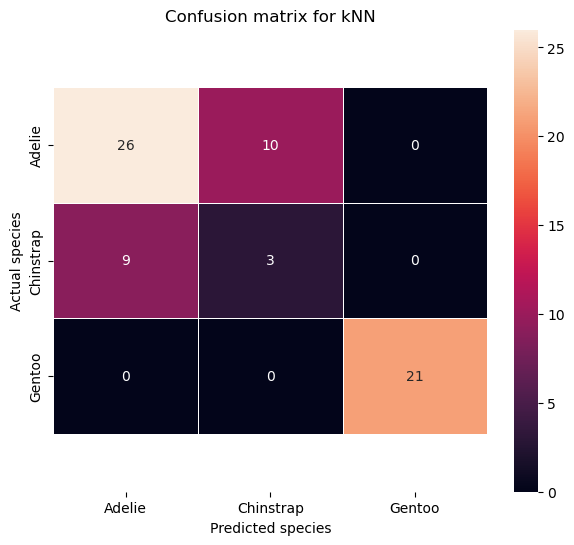

In [181]:
# print confusion matrix (using function from pre-studio notebook)
def plt_confusion_matrix(cnf_matrix, cats, method):
    """
    Given actual target values and predicted values for a classifier 'method', 
    plots the confusion matrix
    """
    # write the confusion matrix to a dataframe with row and column names as the categories
    cmatrix = pd.DataFrame(cnf_matrix,columns=cats,index=cats) 
    f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
    sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
    plt.title('Confusion matrix for '+method) # add a title, + concatenates two strings
    plt.ylabel('Actual species') # add a ylabel
    plt.xlabel('Predicted species') # add a xlabel
    # adjust the bottom and top of the figure, so we can view all of it
    bottom, top = ax.get_ylim()  # get the y axis limits
    ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limits


# create a confusion matrix for our actual and predicted value
cnf_matrix = confusion_matrix(y_test, y_pred) 
plt_confusion_matrix(cnf_matrix, unique_species, 'kNN')


c:\Users\ckcho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


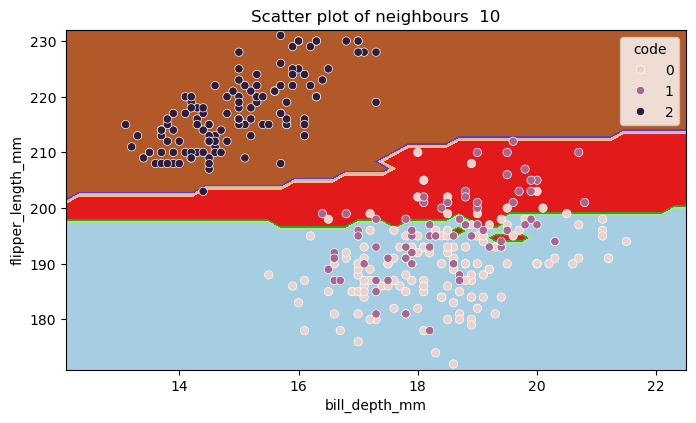

In [176]:
# plot the scatter plot for the model
x_min, x_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
y_min, y_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max),
                     np.linspace(y_min, y_max))

plt.figure(figsize=(8, 15))
plt.subplot(3,1,1)
plt_decision_boundaries(clf, yy, xx)
plt.title('Scatter plot of neighbours  ' +str(n_neighbors))
sns.scatterplot(x=X["bill_depth_mm"], y=X["flipper_length_mm"], hue=Y);


### Exercise 3 (normalisation, plotting)

Our features have quite different variance. Let's see, whether accuracy of kNN model can improve by normalising the the feature array. Divide data in feature array by its standard deviation, **show first 5 rows** and **plot scatterplot of flipper length against bill_depth coloured according to code (or species).**

### Exercise 4 (kNN - normalised data)

Repeat Ex 2 on normalised data created in Ex 3. **Show accuracy score, plot confusion matrix. Did the accuracy score improve?**